In [10]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

In [5]:
def read_log(path):
    with open(path, 'r') as f:
        log = f.read()
    sandbox_logs_section, activities_log_section, trade_history_section = log.split('\n\n\n\n')
    sandbox_logs_section = sandbox_logs_section.split('Sandbox logs:\n')[1]
    activities_log_section = activities_log_section.split('Activities log:\n')[1]
    trade_history_section = trade_history_section.split('\nTrade History:\n[\n  ')[1].split('\n]')[0]

    return process_sandbox_logs(sandbox_logs_section), process_activities_log(activities_log_section), process_trade_history(trade_history_section)

In [6]:
def process_sandbox_logs(sandbox_logs_section):
    # Initialize an empty list to hold the parsed dictionaries
    data_dicts = []
    
    # Split the section into individual JSON strings
    entries = sandbox_logs_section.strip().split('\n}\n{')
    
    # Preprocess to ensure proper JSON format
    entries = [entry if entry.endswith('}') else entry + '}' for entry in entries]
    entries = ['{' + entry if not entry.startswith('{') else entry for entry in entries]
    
    # Parse each JSON string and append the resulting dictionary to our list
    for entry in entries:
        try:
            # Fixing the individual JSON strings if needed
            corrected_entry = entry.replace('\n}\n{', '}\n{')
            data_dict = json.loads(corrected_entry)
            data_dicts.append(data_dict)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            print(f"Faulty entry: {entry}")

    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(data_dicts)
    
    return df

In [7]:
def process_activities_log(activities_log_section):
    return pd.read_csv(StringIO(activities_log_section), sep=';')

In [8]:
def process_trade_history(trade_history_section):
    # Step 1: Transform into a valid JSON array format
    # Enclose the entire string in square brackets and ensure commas are correctly placed
    json_array_str = '[{}]'.format(trade_history_section)
    json_array_str = json_array_str.replace('}\n  {', '},\n  {')
    
    # Step 2: Parse the JSON array
    try:
        trades_list = json.loads(json_array_str)
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        # Return an empty DataFrame in case of an error
        return pd.DataFrame()
    
    # Step 3: Convert the list of dictionaries to a DataFrame
    df_trades = pd.DataFrame(trades_list)
    
    return df_trades

In [11]:
PATH = 'backtests/2024-04-10_10-02-25.log'
sandbox, activities, trade_history = read_log(PATH)

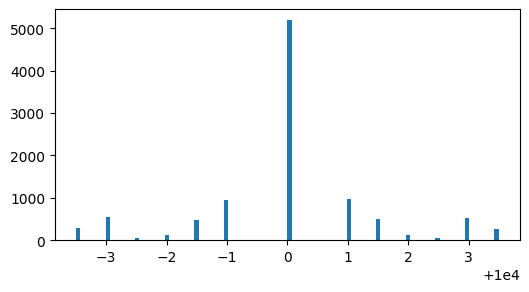

In [12]:
plt.figure(figsize=(6, 3))
plt.hist(activities[activities['product'] == 'AMETHYSTS']['mid_price'], bins=100)
plt.show()

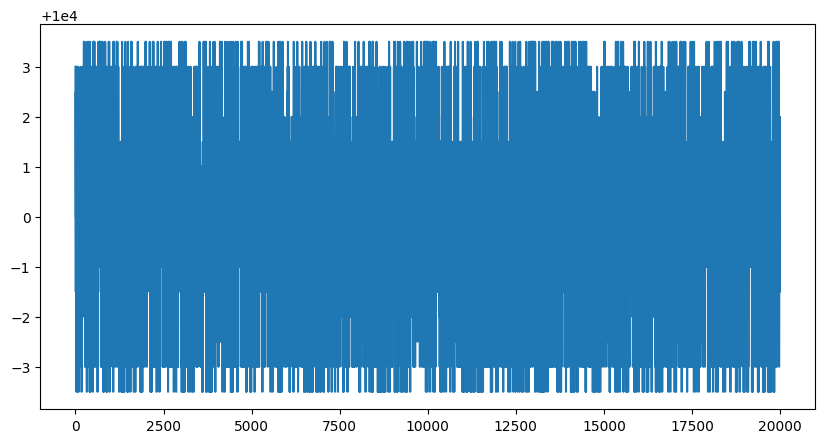

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(activities[activities['product'] == 'AMETHYSTS']['mid_price'])
plt.show()

In [10]:
# price = [5000]
# for p in activities[activities['product'] == 'STARFRUIT']['mid_price']:
#     price.append(price[-1] * 0.99 + p * 0.01)

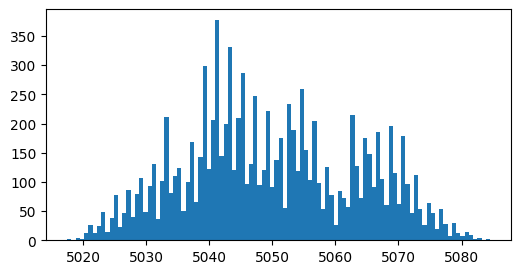

In [14]:
plt.figure(figsize=(6, 3))
plt.hist(activities[activities['product'] == 'STARFRUIT']['mid_price'], bins=100)
plt.show()

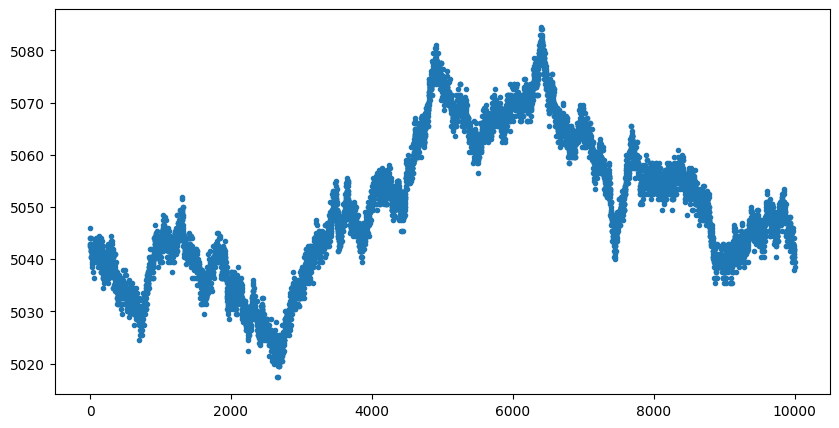

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(range(activities[activities['product'] == 'STARFRUIT'].shape[0]), activities[activities['product'] == 'STARFRUIT']['mid_price'], marker='.')
# plt.plot(price[1:], c='r')
plt.show()

In [17]:
activities[activities['product'] == 'AMETHYSTS']['mid_price'].max(), activities[activities['product'] == 'AMETHYSTS']['mid_price'].min()

(10003.5, 9996.5)

In [18]:
activities[activities['product'] == 'STARFRUIT']['mid_price'].max(), activities[activities['product'] == 'STARFRUIT']['mid_price'].min()

(5084.5, 5017.5)

<Axes: >

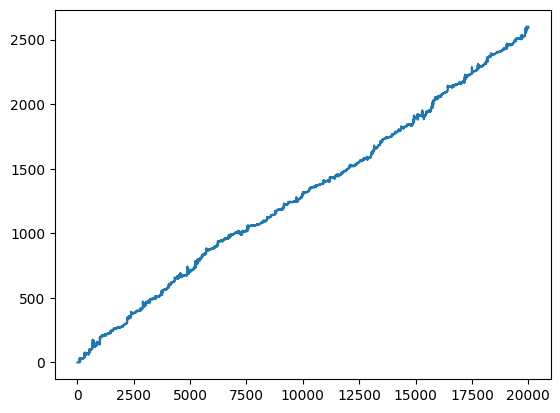

In [19]:
activities[activities['product'] == 'A']['profit_and_loss'].plot()

In [ ]:
activities[activities['product'] == 'STARFRUIT']['profit_and_loss'].plot()

In [156]:
activities[activities['product'] == 'STARFRUIT']

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.000000
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,1.925293
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,2.134766
7,-2,300,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,4999.5,2.299805
9,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,27,NaN,NaN,NaN,NaN,4998.5,3.273438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-2,199500,STARFRUIT,4949,23,NaN,NaN,NaN,NaN,4956,23,NaN,NaN,NaN,NaN,4952.5,-723.226562
3993,-2,199600,STARFRUIT,4949,22,NaN,NaN,NaN,NaN,4956,22,NaN,NaN,NaN,NaN,4952.5,-726.500000
3994,-2,199700,STARFRUIT,4949,27,NaN,NaN,NaN,NaN,4956,27,NaN,NaN,NaN,NaN,4952.5,-725.929688
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,-719.429688


In [157]:
activities[activities['product'] == 'AMETHYSTS']

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.0
5,-2,200,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,2.0
6,-2,300,AMETHYSTS,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,2.0
8,-2,400,AMETHYSTS,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,-2,199500,AMETHYSTS,10002,1,9996.0,1.0,9995.0,22.0,10004,1,10005.0,22.0,NaN,NaN,10003.0,1328.0
3992,-2,199600,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10002,7,10004.0,1.0,10005.0,21.0,9999.0,1330.0
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,NaN,NaN,10001.0,1330.0
3997,-2,199800,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,1330.0


In [158]:
trade_history[trade_history['buyer'] == 'SUBMISSION']

,timestamp,buyer,seller,symbol,currency,price,quantity
6,1200,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
12,2000,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
23,3600,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,4
29,4300,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
34,4700,SUBMISSION,,STARFRUIT,SEASHELLS,4998,7
...,...,...,...,...,...,...,...
1253,193500,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
1255,193700,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
1258,194100,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
1268,195900,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1


In [159]:
trade_history[trade_history['seller'] == 'SUBMISSION']

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
1,0,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1
7,1300,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
10,1800,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
24,3700,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
...,...,...,...,...,...,...,...
1265,195700,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
1269,196000,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,2
1275,197400,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
1283,198900,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1


In [18]:
trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'AMETHYSTS']

C:\Users\aeali\AppData\Local\Temp\ipykernel_16572\2680299177.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'AMETHYSTS']
C:\Users\aeali\AppData\Local\Temp\ipykernel_16572\2680299177.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'AMETHYSTS']


,timestamp,buyer,seller,symbol,currency,price,quantity
2,0,,,AMETHYSTS,SEASHELLS,10004,1
5,1100,,,AMETHYSTS,SEASHELLS,9996,2
8,1700,,,AMETHYSTS,SEASHELLS,10002,1
14,2900,,,AMETHYSTS,SEASHELLS,9996,1
15,2900,,,AMETHYSTS,SEASHELLS,9996,11
...,...,...,...,...,...,...,...
1277,197700,,,AMETHYSTS,SEASHELLS,10002,2
1280,198500,,,AMETHYSTS,SEASHELLS,10005,2
1285,199000,,,AMETHYSTS,SEASHELLS,9996,2
1289,199400,,,AMETHYSTS,SEASHELLS,10004,1


C:\Users\aeali\AppData\Local\Temp\ipykernel_16572\2810643684.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dta = trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'AMETHYSTS']['quantity']
C:\Users\aeali\AppData\Local\Temp\ipykernel_16572\2810643684.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dta = trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'AMETHYSTS']['quantity']


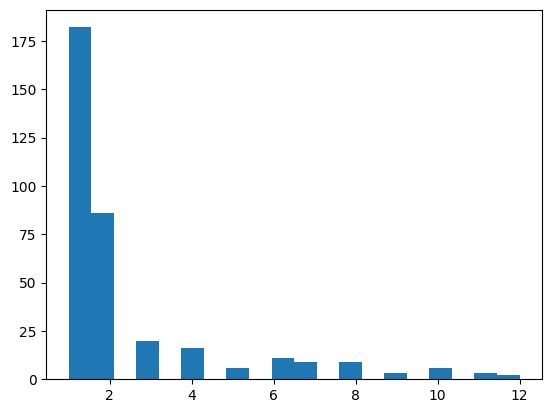

In [16]:
dta = trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'AMETHYSTS']['quantity']
plt.hist(dta, bins=20)
plt.show()

C:\Users\aeali\AppData\Local\Temp\ipykernel_16572\4200217446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dta = trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'STARFRUIT']['quantity']
C:\Users\aeali\AppData\Local\Temp\ipykernel_16572\4200217446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dta = trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'STARFRUIT']['quantity']


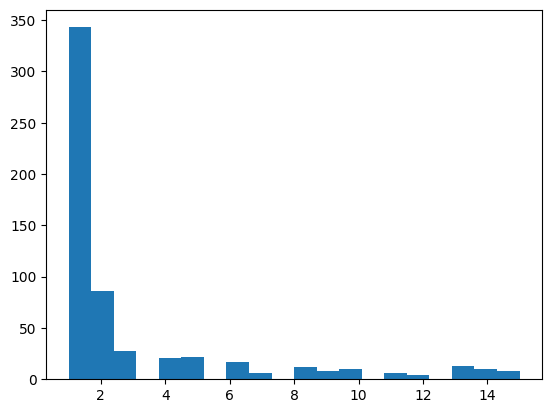

In [17]:
dta = trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'STARFRUIT']['quantity']
plt.hist(dta, bins=20)
plt.show()